In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

#Importing Regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score
#Importing datetime as dt
import datetime as dt
pd.set_option('display.max_columns', None)

In [2]:
#Reading a dataset
data=pd.read_excel('Data_Train.xlsx')

In [3]:
#Top 10 records of a dataset
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
#Shape of a dataset
data.shape

(10683, 11)

Number of Rows :  10683

Number of Columns/ Feature : 11

In [5]:
#Numerical feature from a dataset
num_feature=[feature for feature in data.columns if data[feature].dtypes!='O']
num_feature

['Price']

In [6]:
#Categorical feature from a dataset
cat_feature=[feature for feature in data.columns if data[feature].dtypes=='O']
cat_feature

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

Price is dependent variable and it is only numeric in  dataset



In [7]:
#Describing the categorical feature
data[cat_feature].describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [8]:
#Information of a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#Checkinng for Nan values in a dataset
null_val=[feature for feature in data.columns if data[feature].isnull().sum()>0]

#Feature Name : Number of NaN values in a feature
for feature in null_val:
    print(f"{feature} : {data[feature].isnull().sum()}")

Route : 1
Total_Stops : 1


2 NUll values in a dataset one in route and another in Total_Stops

The Row which contain null values

In [10]:
data[data.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
# Dropping the row where nan values is :
data.drop(9039,axis=0,inplace=True)

-----------

Changing the datatype of a object feature : ['Date_of_Journey','Dep_Time','Arrival_Time'] to datetime 

In [12]:
def change_to_datetime(feature):
    '''Function to convert datatype to datetime'''
    data[feature]=pd.to_datetime(data[feature])

In [13]:
#Columns in a dataset
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# convert datatype ['Date_of_Journey','Dep_Time','Arrival_Time'] of  to datetime
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_datetime(feature)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
#Making a new feature journey_day and journey_month from a Date_of_Journey
data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month

In [17]:
# Top 5 records of a dataset after new features
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-26 05:50:00,2021-09-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-26 18:05:00,2021-09-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-26 16:50:00,2021-09-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
#we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
data.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
#Function to extract hour from a dataset
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [20]:
#Function to extract minutes from a dataset
def extract_min(df,col):
    df[col+"_min"]=df[col].dt.minute

In [21]:
# can extract hour values from Dep_Time
extract_hour(data,'Dep_Time')

#Extracting minutes from Dep_Time
extract_min(data,'Dep_Time')


In [22]:
#Dropping Dep_Time now as houe and min is extracted as a new feature
data.drop('Dep_Time',axis=1,inplace=True)

In [23]:
# can extract hour values from Arrival_Time
extract_hour(data,'Arrival_Time')

#Extracting minutes from Dep_Time
extract_min(data,'Arrival_Time')


In [24]:
#Dropping Arrival_Time now as houe and min is extracted as a new feature
data.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
duration_lst=list(data['Duration'])
for i in range(len(duration_lst)):
    
    if len(duration_lst[i].split(' '))==2:
        #If contain hr as well as min then ignore it
        pass
    else:
         # Check if duration contains only hour
        if 'h' in duration_lst[i]:
             # Adds 0 minute
            duration_lst[i]=duration_lst[i]+' 0m'
        else:
             # if duration contains only second, Adds 0 hour
            duration_lst[i]='0h '+duration_lst[i]
            
            

In [27]:
data['Duration']=duration_lst

In [28]:
#Making a new feature duration_hr which contain Duration hour value


def hour(x):
    return x.split(' ')[0][0:-1]
    

data['duration_hr']=data['Duration'].apply(hour)

In [29]:
#Making a new feature duration_min which contain Duration min value
def min(x):
    return x.split(' ')[1][0:-1]

data['duration_min']=data['Duration'].apply(min)

In [30]:

data['duration_hr']=np.where(data['duration_hr']==' ',0,data['duration_hr'])

In [31]:
# covert string to an integer
data['duration_hr'] = data['duration_hr'].astype(int)
data['duration_min'] = data['duration_min'].astype(int)

In [32]:
# Work fine now lets drop Duration
data.drop('Duration',axis=1,inplace=True)


In [33]:
#TOp 5 records od a data after new feature 
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


Visualizations

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

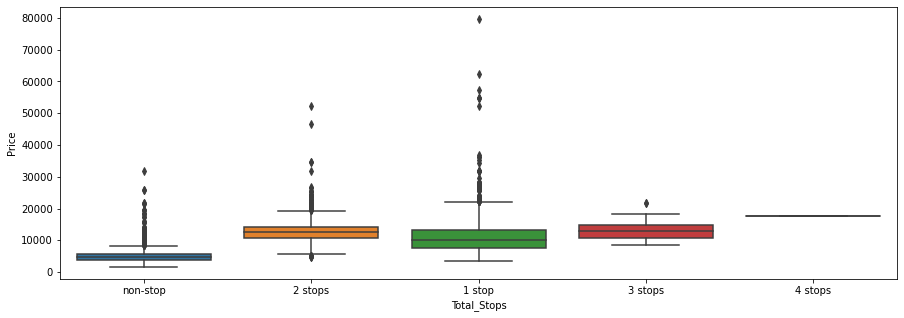

In [34]:
#Box plot of Total_Stops with respect to Price
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=data)


<AxesSubplot:xlabel='Airline', ylabel='Price'>

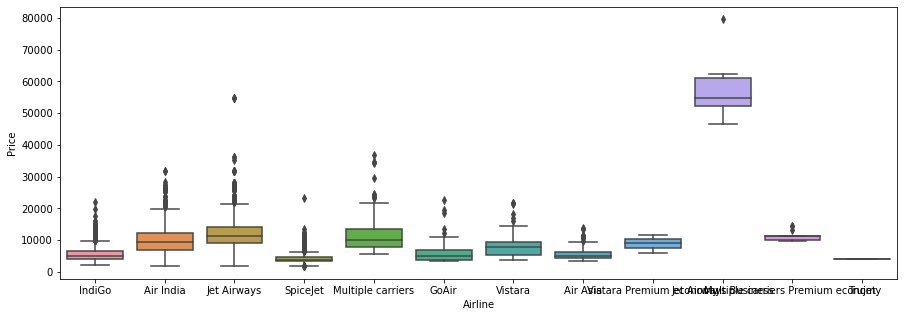

In [35]:
#Box plot of Airline with respect to Price
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=data)

In [36]:
#Value Counts of a Airline
print(data['Airline'].value_counts())
 
#Total categories in a Airline   
print("\nTotal Categories in Airline :  ",len(data['Airline'].unique()))

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Total Categories in Airline :   12


In [37]:
#Dummy variabel of Airline
airline=pd.get_dummies(data['Airline'],drop_first=True)

In [38]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
#Source feature : 
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

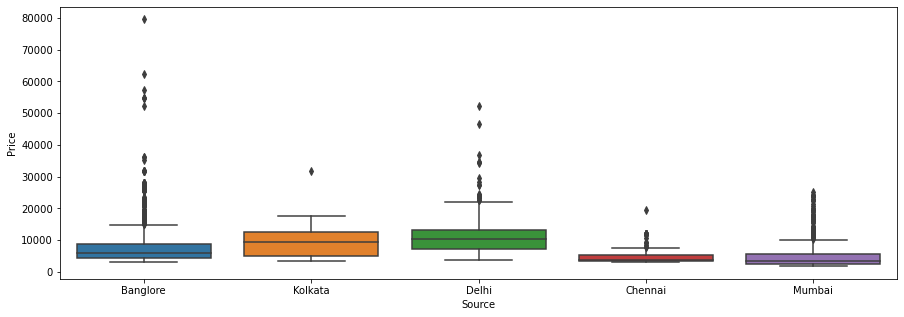

In [40]:
#Box plot of Airline with respect to Price
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=data)

In [41]:
#Dummy variabel of Source
source=pd.get_dummies(data['Source'],drop_first=True)

In [42]:
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [43]:
#Destination feature : 
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

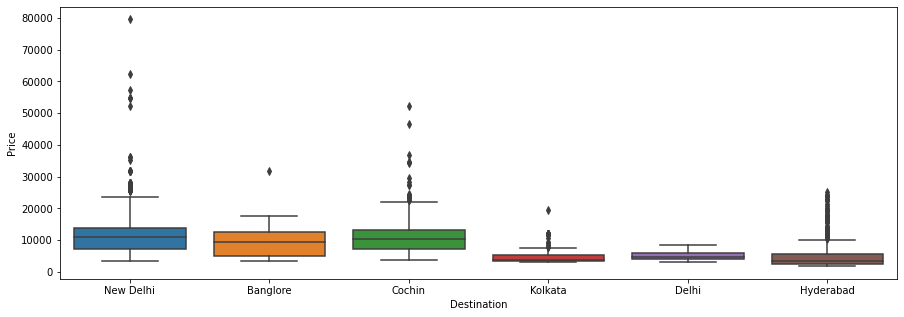

In [44]:
# Box plot of destination
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=data)

In [45]:
#Dummy variable for categies of Desination
destination=pd.get_dummies(data['Destination'],drop_first=True)

In [46]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [48]:
#Dropping Airline, Source, Destinations
data.drop(['Airline', 'Source', 'Destination'],axis=1,inplace=True)

In [49]:
#Concatenating airline, source, destination to a main data
data=pd.concat([airline,source,destination,data],axis=1)

In [50]:
data.shape

(10682, 32)

In [51]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [52]:
#Total Stops Feature in a dataset
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
data['Total_Stops'].isnull().sum()

0

In [54]:
#Filling nan value with mode of feature Total_Stops
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
#Mapping the feature Total_stops
stop_dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(stop_dict)

In [56]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [57]:
# % new feature for routes
data['Route_1']=data['Route'].str.split('→').str[0]
data['Route_2']=data['Route'].str.split('→').str[1]
data['Route_3']=data['Route'].str.split('→').str[2]
data['Route_4']=data['Route'].str.split('→').str[3]
data['Route_5']=data['Route'].str.split('→').str[4]

In [58]:
#Dropping Routes 
data.drop("Route",axis=1,inplace=True)

In [59]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [60]:
#Additional Info
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [61]:
#Replacing no_info to No_info
data['Additional_Info']=np.where(data['Additional_Info']=='No Info','No info',data['Additional_Info'])

In [62]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [63]:
#Label Encoding for Route
encoder=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5','Additional_Info']:
    data[i]=encoder.fit_transform(data[i])

In [64]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,7,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [65]:

def plot(df,col):
    '''Function to plot histogram and boxplot'''
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\Mukut\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mukut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 3600x3600 with 0 Axes>

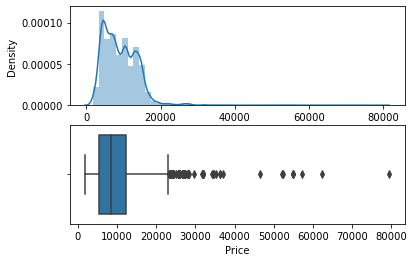

In [66]:
plt.figure(figsize=(50,50))
#Box Plot and Displot of Price Dependent variable
plot(data,'Price')

In [67]:
#Replacing the points which are greater then 40000
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

C:\Users\Mukut\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mukut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 3600x3600 with 0 Axes>

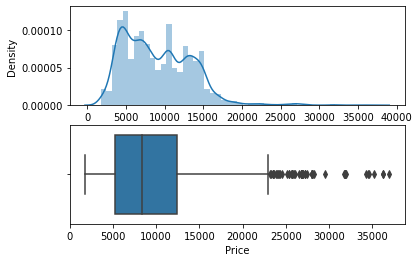

In [68]:
plt.figure(figsize=(50,50))
#Box Plot and Displot of Price Dependent variable
plot(data,'Price')

In [69]:
# Looking a dataset 
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3897.0,24,3,22,20,1,10,2,50,0,13,29,13,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7,7662.0,5,1,5,50,13,15,7,25,2,25,1,3,5
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,7,13882.0,6,9,9,25,4,25,19,0,3,32,4,5,5
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7,6218.0,5,12,18,5,23,30,5,25,2,34,3,13,5
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7,13302.0,3,1,16,50,21,35,4,45,0,34,8,13,5


In [70]:
#Dependent and independent 
x=data.drop('Price',axis=1)
y=data['Price']

--------

Feature Selection

In [71]:
mutual_info_classif(x,y)

array([0.75968854, 0.10343887, 0.67794097, 0.92851458, 0.0064967 ,
       0.5847593 , 0.00551719, 0.31932025, 0.        , 0.22581111,
       0.02002516, 0.1751363 , 1.52693519, 0.87782608, 0.29808993,
       1.58136018, 0.42001665, 0.28992996, 0.17279795, 0.3610304 ,
       2.18703225, 1.56083669, 1.08149517, 0.87207351, 1.43752331,
       1.21300478, 1.84703946, 1.51779319, 1.78396588, 1.08067049,
       2.01862156, 2.78051105, 2.30971084, 1.44467439, 0.72479493])

In [72]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.750772
Route_3,2.310597
Total_Stops,2.128787
Route_1,2.022052
Arrival_Time_hour,1.855306
duration_hr,1.772326
Additional_Info,1.610322
Arrival_Time_min,1.550043
Cochin,1.534474
Delhi,1.530039


In [73]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [74]:
#Using linear regression
lr=LinearRegression()
#Fitting Training set
lr.fit(x_train,y_train)
#Prediciting value for testing set
lr_predict1=lr.predict(x_test)
r2_score1=r2_score(y_test,lr_predict1)
print('r2 score: {}'.format(r2_score1))

r2 score: 0.6261488393944235


In [84]:
#Using xgboost
xg=XGBRegressor()
#Fitting Training set
xg.fit(x_train.values,y_train)
#Prediciting value for testing set
xg_predict=xg.predict(x_test.values)
r2_score2=r2_score(y_test,xg_predict)
print('r2 score: {}'.format(r2_score2))

r2 score: 0.9105807660217973


In [85]:
# Using RandomForestRegressor
rf=RandomForestRegressor()
#Fitting Training set
rf.fit(x_train.values,y_train)
#Prediciting value for testing set
rf_predict=rf.predict(x_test.values)
r2_score3=r2_score(y_test,rf_predict)
print('r2 score: {}'.format(r2_score3))


r2 score: 0.913508757008354
